In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
# Getting the Minute by Minute Stock Price Data From Quantopian API
start = "2017-11-20"
end = '2017-11-24'
frequency = 'minute'
AAL= get_pricing("AAL", start_date=start, end_date=end, frequency=frequency)
UAL= get_pricing("UAL", start_date=start, end_date=end, frequency=frequency)
OIL= get_pricing("OIL", start_date=start, end_date=end, frequency=frequency)

In [119]:
AAL.head()

,open_price,high,low,close_price,volume,price
2017-11-20 14:31:00+00:00,47.330,47.39,47.200,47.20,36156.0,47.20
2017-11-20 14:32:00+00:00,47.195,47.31,47.195,47.31,2200.0,47.31
2017-11-20 14:33:00+00:00,47.303,47.36,47.300,47.36,2600.0,47.36
2017-11-20 14:34:00+00:00,47.360,47.39,47.340,47.39,5356.0,47.39
2017-11-20 14:35:00+00:00,47.371,47.43,47.350,47.43,4500.0,47.43


In [20]:
UAL.head()

,open_price,high,low,close_price,volume,price
2017-11-20 14:31:00+00:00,58.260,58.260,58.01,58.03,23642.0,58.03
2017-11-20 14:32:00+00:00,58.055,58.100,57.97,57.98,13933.0,57.98
2017-11-20 14:33:00+00:00,58.000,58.000,57.90,57.92,7760.0,57.92
2017-11-20 14:34:00+00:00,57.910,57.965,57.88,57.89,10807.0,57.89
2017-11-20 14:35:00+00:00,57.950,57.950,57.82,57.94,21840.0,57.94


In [21]:
OIL.head()

,open_price,high,low,close_price,volume,price
2017-11-20 14:31:00+00:00,5.990,5.990,5.980,5.981,39866.0,5.981
2017-11-20 14:32:00+00:00,NaN,NaN,NaN,NaN,0.0,5.981
2017-11-20 14:33:00+00:00,NaN,NaN,NaN,NaN,0.0,5.981
2017-11-20 14:34:00+00:00,5.985,5.985,5.985,5.985,100.0,5.985
2017-11-20 14:35:00+00:00,5.980,5.990,5.980,5.990,1990.0,5.990


In [23]:
# Verify that the dimensions of all three Datasets are the same
OIL.shape == UAL.shape == AAL.shape

True

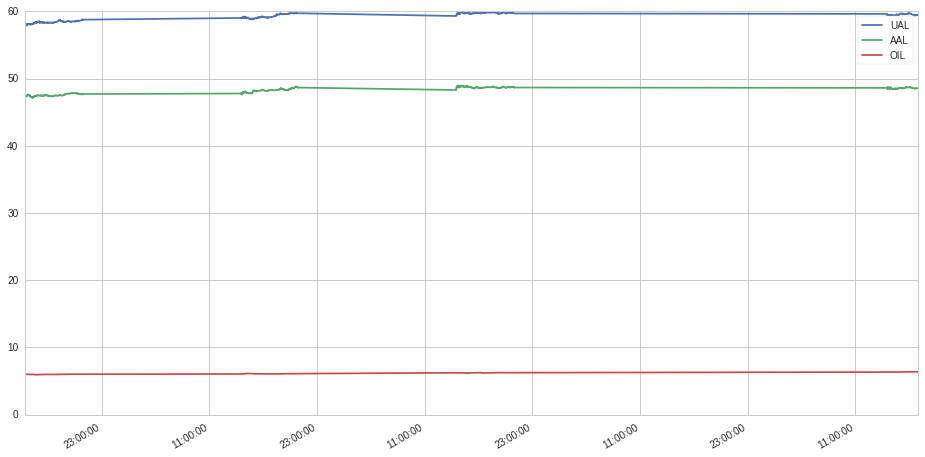

In [24]:
UAL['price'].plot(figsize = (16,8), label = "UAL")
AAL['price'].plot( label = "AAL")
OIL['price'].plot( label = "OIL")
plt.legend()

In [68]:
# Getting All price rows except the last hour
American = AAL['price'].head(AAL.shape[0]-60)
United = UAL['price'].head(UAL.shape[0]-60)
CrudeOil = OIL['price'].head(OIL.shape[0]-60)

In [74]:
# Creating the Training Set
Train = pd.concat([American, United, CrudeOil] , axis = 1)
Train.columns = ["AAL" , "UAL", "OIL"]

In [120]:
Train.head()

,AAL,UAL,OIL
2017-11-20 14:31:00+00:00,47.20,58.03,5.981
2017-11-20 14:32:00+00:00,47.31,57.98,5.981
2017-11-20 14:33:00+00:00,47.36,57.92,5.981
2017-11-20 14:34:00+00:00,47.39,57.89,5.985
2017-11-20 14:35:00+00:00,47.43,57.94,5.990


In [77]:
# Getting Only the Last hour Stock Prices
American = AAL['price'].tail(60)
United = UAL['price'].tail(60)
CrudeOil = OIL['price'].tail(60)

In [81]:
# Creating the Test Set
Test = pd.concat([American, United, CrudeOil] , axis = 1)
Test.columns = ["AAL" , "UAL", "OIL"]

In [84]:
# Exporting Training Set and Test Set to excel
Train.to_csv("TrainingSet.csv")
Test.to_csv("TestSet.csv")

SandboxViolation: Blacklisted attribute within module to_csv

In [122]:
Test.head()

,AAL,UAL,OIL
2017-11-24 17:01:00+00:00,48.665,59.680,6.355
2017-11-24 17:02:00+00:00,48.680,59.685,6.351
2017-11-24 17:03:00+00:00,48.670,59.680,6.350
2017-11-24 17:04:00+00:00,48.680,59.690,6.350
2017-11-24 17:05:00+00:00,48.710,59.680,6.350
